<a href="https://colab.research.google.com/github/mukhandmath-shivaprasad/3D_printer_dataset/blob/main/3D_Printer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import os
# import tarfile
# import urllib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# folder_path = os.path.join('dataset','3d_printer')
# def fetch_data(path = path, folder_path = folder_path ):
#   if not os.path.isdir(folder_path):
#     os.makedirs(folder_path)
#   zip_path = os.path.join(folder_path, '3d_printer.zip')
#   urllib.request.urlretrieve()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML Projects/3D printer /data.csv')
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [ ]:
df.shape

(50, 12)

In [ ]:
df.describe(exclude=['object'])

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000
mean,0.106000,5.220000,53.40000,221.500000,70.000000,64.0000,50.000000,170.580000,20.080000,1.672000
std,0.064397,2.922747,25.36348,14.820353,7.142857,29.6923,35.714286,99.034129,8.925634,0.788188
min,0.020000,1.000000,10.00000,200.000000,60.000000,40.0000,0.000000,21.000000,4.000000,0.400000
25%,0.060000,3.000000,40.00000,210.000000,65.000000,40.0000,25.000000,92.000000,12.000000,1.100000
50%,0.100000,5.000000,50.00000,220.000000,70.000000,60.0000,50.000000,165.500000,19.000000,1.550000
75%,0.150000,7.000000,80.00000,230.000000,75.000000,60.0000,75.000000,239.250000,27.000000,2.175000
max,0.200000,10.000000,90.00000,250.000000,80.000000,120.0000,100.000000,368.000000,37.000000,3.300000


In [ ]:
df['infill_pattern'].value_counts()

grid         25
honeycomb    25
Name: infill_pattern, dtype: int64

In [ ]:
df['material'].value_counts()

abs    25
pla    25
Name: material, dtype: int64

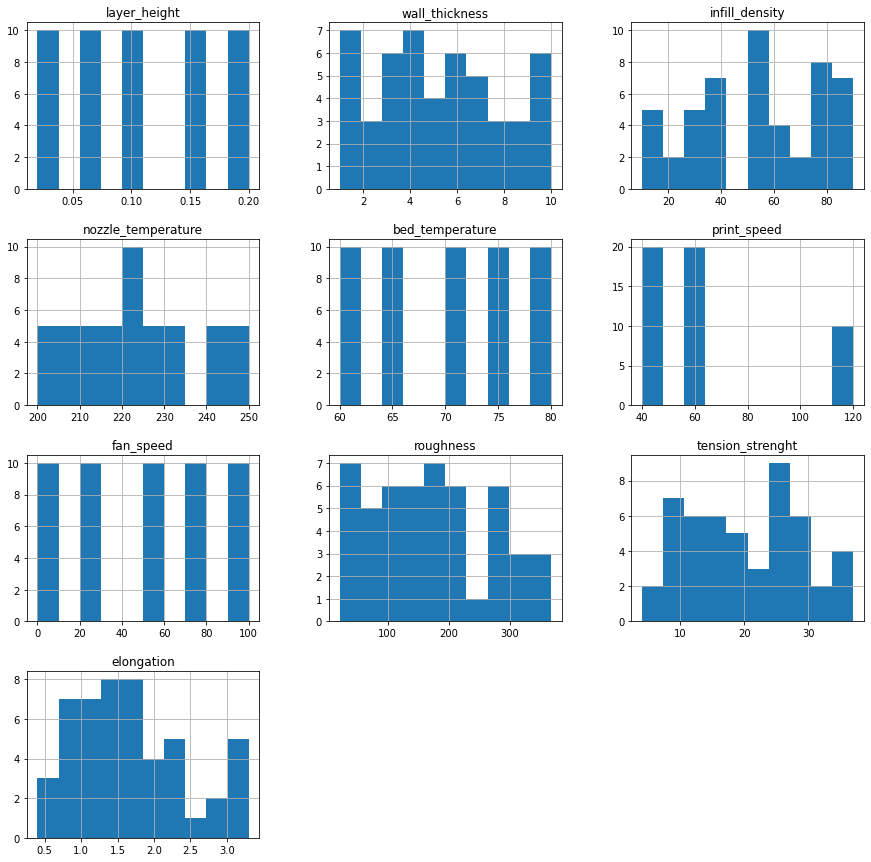

In [ ]:
df.hist(figsize=(15,15))
plt.show()

In [ ]:
df['print_speed'].value_counts()

40     20
60     20
120    10
Name: print_speed, dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler

Since the dataset is smaller creating train and test sets wouldnt' be useful for model bulding 

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 0)
for train_index, test_index in split.split(df, df['material']):
  strat_train_set = df.loc[train_index]
  strat_test_set =  df.loc[test_index]

In [ ]:
df['material'].value_counts()/ len(df)

abs    0.5
pla    0.5
Name: material, dtype: float64

In [ ]:
strat_train_set['material'].value_counts()/ len(strat_train_set)

pla    0.5
abs    0.5
Name: material, dtype: float64

In [ ]:
strat_test_set['material'].value_counts()/ len(strat_test_set)

pla    0.5
abs    0.5
Name: material, dtype: float64

In [ ]:
strat_train_set.shape

(40, 12)

In [ ]:
strat_test_set.shape

(10, 12)

**Stratified wrt material**

In [ ]:
dataset = strat_train_set.copy()

In [ ]:
dataset.columns

Index(['layer_height', 'wall_thickness', 'infill_density', 'infill_pattern',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'material',
       'fan_speed', 'roughness', 'tension_strenght', 'elongation'],
      dtype='object')

**Data Visualisation**

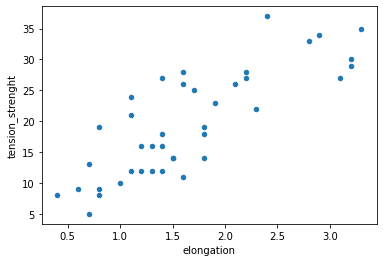

In [ ]:
dataset.plot(kind = 'scatter', x = 'elongation', y = 'tension_strenght' )

In [ ]:
corr_matrix = dataset.corr()

In [ ]:
corr_matrix['tension_strenght'].sort_values(ascending = False)

tension_strenght      1.000000
elongation            0.813400
layer_height          0.353472
wall_thickness        0.324570
infill_density        0.305205
roughness             0.024541
bed_temperature      -0.219494
fan_speed            -0.219494
print_speed          -0.245586
nozzle_temperature   -0.398638
Name: tension_strenght, dtype: float64

In [ ]:
dataset['temp_per_height'] = dataset['bed_temperature'] / dataset['layer_height']
dataset['time_per_layer'] = dataset['print_speed'] / dataset['layer_height']

In [ ]:
# dataset.columns

In [ ]:
corr_matrix = dataset.corr()
corr_matrix['tension_strenght'].sort_values(ascending = False)

tension_strenght      1.000000
elongation            0.813400
layer_height          0.353472
wall_thickness        0.324570
infill_density        0.305205
roughness             0.024541
bed_temperature      -0.219494
fan_speed            -0.219494
print_speed          -0.245586
temp_per_height      -0.252221
time_per_layer       -0.364788
nozzle_temperature   -0.398638
Name: tension_strenght, dtype: float64

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
attributes = ['tension_strenght', 'elongation','layer_height', 
              'wall_thickness', 'infill_density', 
              'nozzle_temperature', 'time_per_layer']

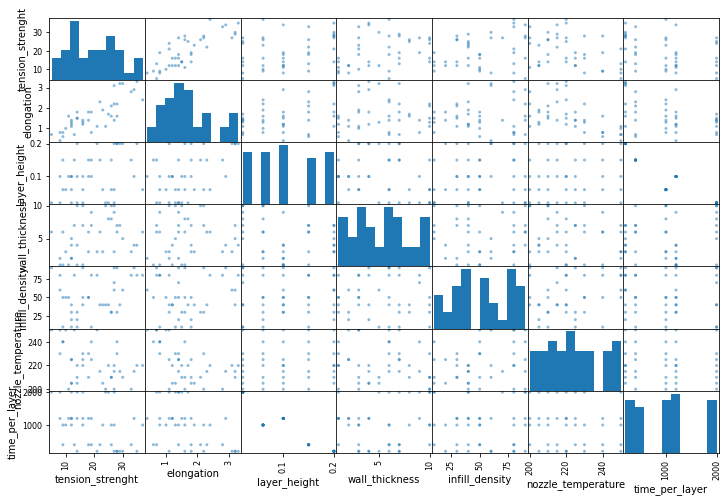

In [ ]:
scatter_matrix(dataset[attributes], figsize=(12,8));

In [ ]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


**Data Preparation**

In [ ]:
dataset = df.copy()

In [ ]:
X = dataset.drop(['roughness','tension_strenght','elongation'], axis = 1)
y = dataset['tension_strenght']

In [ ]:
X.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,8,90,grid,220,60,40,abs,0
1,0.02,7,90,honeycomb,225,65,40,abs,25
2,0.02,1,80,grid,230,70,40,abs,50
3,0.02,4,70,honeycomb,240,75,40,abs,75
4,0.02,6,90,grid,250,80,40,abs,100


In [ ]:
# y

In [ ]:
numeric_cols = X.select_dtypes(exclude='object').columns
unordered_cols = ['infill_pattern', 'material']

In [ ]:
print(numeric_cols)
print(unordered_cols)

Index(['layer_height', 'wall_thickness', 'infill_density',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed'],
      dtype='object')
['infill_pattern', 'material']


In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 0)
for train_index, test_index in split.split(X, X['material']):
  # print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

In [ ]:
X_train.shape

(40, 9)

In [ ]:
OHE = OneHotEncoder(handle_unknown='ignore', sparse=False)
oh_cols_train = pd.DataFrame(OHE.fit_transform(X_train[unordered_cols]))
oh_cols_test = pd.DataFrame(OHE.fit_transform(X_test[unordered_cols]))
oh_cols_train.index = X_train.index
oh_cols_test.index = X_test.index

In [ ]:
sc = StandardScaler()
sc_cols_train = pd.DataFrame(sc.fit_transform(X_train[numeric_cols]))
sc_cols_test = pd.DataFrame(sc.fit_transform(X_test[numeric_cols]))
sc_cols_train.index = X_train.index
sc_cols_test.index = X_test.index

In [ ]:
# sc_cols_train

In [ ]:
encoded_X_train = pd.concat([oh_cols_train, sc_cols_train], axis = 1)
encoded_X_test = pd.concat([oh_cols_test, sc_cols_test], axis = 1)

In [ ]:
# encoded_X_test

,0,1,2,3,0,1,2,3,4,5,6
45,0.0,1.0,0.0,1.0,1.368583,-0.034320,0.000000,-1.800853,-1.171700,-0.792406,-1.171700
0,1.0,0.0,1.0,0.0,-1.399338,0.995277,1.315587,0.046176,-1.171700,-0.792406,-1.171700
41,0.0,1.0,1.0,0.0,1.368583,1.338477,1.315587,0.507933,-0.520756,-0.792406,-0.520756
3,0.0,1.0,1.0,0.0,-1.399338,-0.377519,0.438529,1.893204,0.781133,-0.792406,0.781133
36,1.0,0.0,0.0,1.0,0.599716,-0.377519,-0.438529,-1.339096,-0.520756,0.088045,-0.520756
39,0.0,1.0,0.0,1.0,0.599716,-1.407116,-2.192645,0.046176,1.432078,0.088045,1.432078
19,0.0,1.0,0.0,1.0,-0.784244,1.681676,-0.438529,0.046176,1.432078,0.088045,1.432078
30,1.0,0.0,1.0,0.0,0.599716,-0.377519,-0.438529,0.046176,-1.171700,0.088045,-1.171700
18,1.0,0.0,0.0,1.0,-0.784244,-0.034320,0.877058,-0.415581,0.781133,0.088045,0.781133
22,1.0,0.0,1.0,0.0,-0.169151,-1.407116,-0.438529,0.969690,0.130189,2.729398,0.130189


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error
def score_dataset(X_train, X_test, y_train, y_test, model):
  model = model
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, preds))
  return rmse

In [ ]:
lr_model = LinearRegression()
score_dataset(encoded_X_train, encoded_X_test, y_train, y_test, lr_model)

7.428783164896668

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
RF_model = RandomForestRegressor()
score_dataset(encoded_X_train, encoded_X_test, y_train, y_test, RF_model)

6.338038340054436

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor()
score_dataset(encoded_X_train, encoded_X_test, y_train, y_test, DT_model)

9.50263121456368

In [ ]:
from sklearn.svm import SVR
svr_model = SVR()
score_dataset(encoded_X_train, encoded_X_test, y_train, y_test, svr_model)

9.213574120615862